## Last updated Dec 28, 2023

In [1]:
import pandas as pd
import numpy as np
import os
import geopandas as gpd

os.getlogin()

'matto'

In [2]:
path = r"C:\Users\matto\Desktop\School Choice"
data = os.path.join(path, "Data")

zip_path = os.path.join(data, "tl_2020_us_zcta520") 
district_shape_path = os.path.join(data, "TL_2022_SD") 

output = os.path.join(path, "Output")

## CTD ADM Dictionary

In [3]:
ctd_adm = pd.read_csv(os.path.join(data, "SchoolInfo.csv"))
ctd_adm_grade_dict = dict(zip(ctd_adm['EntityID'], ctd_adm['Grades']))
ctd_adm_type_dict = dict(zip(ctd_adm['EntityID'], ctd_adm['Entity_Type']))
ctd_adm_name_dict = dict(zip(ctd_adm['EntityID'], ctd_adm['Name']))

In [4]:
ctds_adm = pd.read_csv(os.path.join(data, "CTDS_ADM_FY_22.csv"))
ctds_adm_grade_dict = dict(zip(ctd_adm['EntityID'], ctd_adm['Grades']))
ctds_adm_type_dict = dict(zip(ctd_adm['EntityID'], ctd_adm['Entity_Type']))
ctds_adm_name_dict = dict(zip(ctd_adm['EntityID'], ctd_adm['Name']))

In [5]:
letter = pd.ExcelFile(os.path.join(data, "FY20Combined20Public202023-06-26.xlsx"))
letter.sheet_names

grades = pd.DataFrame()

for sheet in ['Traditional K-8 Schools','Traditional 9-12 Schools','Traditional Hybrid Schools','Alternative Schools']:
    temp = pd.read_excel(os.path.join(data, "FY20Combined20Public202023-06-26.xlsx"), sheet_name = sheet)
    temp = temp[['School Name','School Code','Letter Grade','Model']]
    grades = pd.concat([grades, temp])

In [6]:
letter_grade_dict = dict(zip(grades['School Code'], grades['Letter Grade']))

## ELSI

In [7]:
edge = pd.read_csv(os.path.join(data,"ELSI_csv_export_6383927981376258893363.csv"), 
                   skiprows = 6)

edge.drop(columns = ['School Name'], inplace = True)

edge.columns = [c.replace("[Public School] Latest available year","") for c in edge.columns]
edge.columns = [c.replace("[Public School] 2021-22","") for c in edge.columns]
edge.columns = [c.replace("(SY 2017-18 onward) ","") for c in edge.columns]
edge.columns = [c.strip() for c in edge.columns]

edge['LEAID'] = edge['State School ID'].str.split("-").str[-2]
edge['State School ID'] = edge['State School ID'].str.split("-").str[-1]

edge = edge[edge['State School ID'].notnull()]

edge['LEA Type'] = edge['LEAID'].astype(int).map(ctd_adm_type_dict)
edge['LEA Grade'] = edge['LEAID'].astype(int).map(ctd_adm_grade_dict)
edge['LEA Name'] = edge['LEAID'].astype(int).map(ctd_adm_name_dict)

edge['Letter'] = edge['State School ID'].astype(int).map(letter_grade_dict)

edge_gdf = gpd.GeoDataFrame(edge, geometry = gpd.points_from_xy(edge.Longitude, edge.Latitude))
edge_gdf.set_crs("EPSG:4269", inplace = True)
edge_gdf

,State Name,School Name,School ID - NCES Assigned,Latitude,Longitude,State School ID,State Agency ID,School Level,LEAID,LEA Type,LEA Grade,LEA Name,Letter,geometry
0,Arizona,A J Mitchell Elementary School,4.055300e+10,31.347700,-110.938900,5958,AZ-4457,Elementary,4457,District,'PK-12,Nogales Unified District,B,POINT (-110.93890 31.34770)
1,ARIZONA,A+ Charter Schools,4.009980e+10,33.042533,-112.015895,1000972,AZ-1000166,High,1000166,Charter Holder,'7-12,A+ Charter Schools,B,POINT (-112.01590 33.04253)
2,Arizona,A. C. E.,4.046300e+10,32.453107,-111.207690,5768,AZ-4404,High,4404,District,'PK-12,Marana Unified District,NaN,POINT (-111.20769 32.45311)
3,Arizona,AAEC - Paradise Valley,4.001060e+10,33.654305,-112.001380,6344,AZ-4331,High,4331,Charter Holder,'9-12,"Arizona Agribusiness & Equine Center, Inc.",A,POINT (-112.00138 33.65431)
4,Arizona,AAEC - SMCC Campus,4.004170e+10,33.378982,-112.039907,5503,AZ-85816,High,85816,Charter Holder,'9-12,"Arizona Agribusiness & Equine Center, Inc.",B,POINT (-112.03991 33.37898)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2501,ARIZONA,Yuma District One Digital Learning Academy,4.096000e+10,32.716311,-114.625427,92641,AZ-4499,Elementary,4499,District,'PK-8,Yuma Elementary District,NaN,POINT (-114.62543 32.71631)
2502,Arizona,Yuma High School,4.096300e+10,32.719300,-114.629600,6189,AZ-4507,High,4507,District,'9-12,Yuma Union High School District,C,POINT (-114.62960 32.71930)
2503,Arizona,Yuma Online Distance Academy,4.096300e+10,32.670152,-114.633814,91316,AZ-4507,High,4507,District,'9-12,Yuma Union High School District,NaN,POINT (-114.63381 32.67015)
2504,Arizona,Zaharis Elementary,4.049700e+10,33.455000,-111.628000,79807,AZ-4235,Elementary,4235,District,'PK-12,Mesa Unified District,A,POINT (-111.62800 33.45500)


## Shapefile Setup

In [8]:
zip_shape = gpd.read_file(os.path.join(zip_path, "tl_2020_us_zcta520.shp"))
zip_shape = zip_shape.to_crs('EPSG:2223')
zip_shape['zip_area'] = zip_shape.area/2.788e+7

## District Shape Files

In [9]:
elementary = gpd.read_file(os.path.join(district_shape_path, "TL_2022_US_SDE.shp"))
unified = gpd.read_file(os.path.join(district_shape_path, "TL_2022_US_SDU.shp"))

elementary = elementary[elementary['STATEFP'] == "04"]
unified = unified[unified['STATEFP'] == "04"]

district_shape = gpd.pd.concat([elementary, unified])
district_shape = district_shape.to_crs('EPSG:2223')
district_shape['district_area'] = district_shape.area/2.788e+7

## Intersect district with zip code shape file

In [10]:
district_intersect_zip = gpd.overlay(district_shape, zip_shape, how = 'intersection', keep_geom_type = True)
district_intersect_zip['district_intersect_zip_area'] = district_intersect_zip.area/2.788e+7

C:\Users\matto\anaconda3\envs\Python_3_11\Lib\site-packages\geopandas\geodataframe.py:1815: FutureWarning: `unary_union` returned None due to all-None GeoSeries. In future, `unary_union` will return 'GEOMETRYCOLLECTION EMPTY' instead.
  merged_geom = block.unary_union


## Update CRS for all shape files

In [11]:
zip_shape.to_crs('EPSG:4269', inplace = True)
district_shape.to_crs('EPSG:4269', inplace = True)

In [12]:
district_intersect_zip.to_crs('EPSG:4269', inplace = True)
district_intersect_zip['pct_overlap'] = district_intersect_zip['district_intersect_zip_area']/district_intersect_zip['zip_area']

In [13]:
# district_intersect_zip.rename(columns = {'SCHOOLYEAR':'SY',
#  'district_area':'dist_area',
#  'FUNCSTAT20':'FUNCSTAT',
#  'INTPTLAT20':'INTPTLAT',
#  'INTPTLON20':'INTPTLON',
#  'district_intersect_zip_area':'inter_area',
#  'pct_overlap':'pct_over'
# }, inplace = True)

In [116]:
district_intersect_zip.to_file(os.path.join(district_shape_path,"District_Intersect_Zip.shp"))

C:\Users\matto\AppData\Local\Temp\ipykernel_43924\3556926830.py:1: UserWarning: Column names longer than 10 characters will be truncated when saved to ESRI Shapefile.
  district_intersect_zip.to_file(os.path.join(district_shape_path,"District_Intersect_Zip.shp"))


## Load in open enrollment data - boundary district first

In [15]:
df = pd.read_excel(os.path.join(data,"FY 2022 Open Enrollment Data.xlsx"), 
                   sheet_name = "School by Boundary District", skiprows = 1)

## Roosevelt is 4279 and Kyrene is 4267

In [16]:
df[df['Boundary District ID'] == 4279].groupby(['Attending LEA Name'])['Total ADM'].sum().sort_values(ascending = False)

Attending LEA Name
Roosevelt Elementary District                                                 6084.0231
The Paideia Academies, Inc                                                     604.3039
Laveen Elementary District                                                     485.5146
Kyrene Elementary District                                                     470.8267
Espiritu Community Development Corp.                                           410.0755
Fit Kids, Inc. dba Champion Schools                                            407.2133
Phoenix Education Management, LLC,                                             389.3511
Tempe School District                                                          354.5465
Morrison Education Group, Inc.                                                 331.7810
ASU Preparatory Academy                                                        320.2242
BASIS Charter Schools, Inc.                                                    314.9424
EAGLE South M

In [17]:
df[df['Attending LEA ID'] == 4267].groupby(['Boundary District ID','Boundary District Name'])['Total ADM'].sum()

Boundary District ID  Boundary District Name          
4235                  Mesa Unified District                 380.0201
4239                  Gilbert Unified District               46.0135
4241                  Paradise Valley Unified District       11.0850
4242                  Chandler Unified District #80         554.8292
4258                  Tempe School District                 608.1685
4267                  Kyrene Elementary District          11039.5844
4276                  Laveen Elementary District             61.3642
4279                  Roosevelt Elementary District         470.8267
4441                  Maricopa Unified School District      283.5810
Other                 Other                                 745.5886
Name: Total ADM, dtype: float64

## Specify Kyrene schools with bussing

In [18]:
bus_list = [5303, 5304, 5301, 5305, 5299, 5298, 79143, 5311, 5318, 78923]

In [18]:
# df2 = df[df['Attending LEA ID'] == 4258].groupby(['School Name','School ID','Boundary District Name'])['Total ADM'].sum().unstack()
# df2['Total'] = df2.sum(axis = 1)
# df2['Not Tempe'] = df2['Total'] - df2['Tempe School District']
# df2.sort_values(by = 'Not Tempe', ascending = False)

## School Level Summary Statistics - Kyrene

In [19]:
df2 = df[df['Attending LEA ID'] == 4267]\
    .groupby(['School Name','School ID','Boundary District Name'])['Total ADM'].sum().unstack()

In [20]:
bdry_list = list(df[df['Attending LEA ID'] == 4267]['Boundary District Name'].unique())

In [21]:
df2.head()

,Boundary District Name,Chandler Unified District #80,Gilbert Unified District,Kyrene Elementary District,Laveen Elementary District,Maricopa Unified School District,Mesa Unified District,Other,Paradise Valley Unified District,Roosevelt Elementary District,Tempe School District
School Name,School ID,,,,,,,,,,
C I Waggoner School,5302,18.6742,NaN,302.7236,NaN,NaN,23.9504,16.2450,NaN,22.0000,47.5721
Kyrene Akimel A-Al Middle School,5298,16.1400,NaN,676.4019,NaN,123.0796,NaN,34.5100,NaN,16.0000,12.9566
Kyrene Altadena Middle School,5297,NaN,NaN,938.0490,14.4798,NaN,NaN,24.9600,NaN,10.4681,NaN
Kyrene Aprende Middle School,5296,101.2271,20.8398,764.5616,NaN,12.0000,59.9015,21.0000,NaN,NaN,36.0400
Kyrene Centennial Middle School,5299,NaN,NaN,547.4192,22.2244,NaN,NaN,28.2184,NaN,98.7018,43.9722


In [22]:
df2['Total'] = df2.sum(axis = 1)

In [23]:
df2.reset_index(inplace = True)

In [24]:
df2['Bus'] = np.where(df2['School ID'].isin(bus_list), 1, 0)

In [25]:
df2['Not Kyrene'] = df2['Total'] - df2['Kyrene Elementary District'] #- df2['Other']

In [32]:
styles = [dict(selector="caption",
                       props=[("text-align", "center"),
                              ("font-size", "150%"),
                              ("color", 'black')])]

for c in ['Maricopa Unified School District','Roosevelt Elementary District']:
    display(df2.sort_values(by = [c], ascending = False).head(10)[['School Name', 'School ID', c]]\
                .style.set_caption("Top Kyrene Schools for residents of " + str(c)).set_table_styles(styles))

Boundary District Name,School Name,School ID,Maricopa Unified School District
1,Kyrene Akimel A-Al Middle School,5298,123.079600
5,Kyrene De Los Lagos School,5311,46.648000
12,Kyrene de la Estrella Elementary School,78923,31.500100
23,Kyrene del Milenio,79143,29.333800
6,Kyrene Digital Academy,1001168,29.019500
3,Kyrene Aprende Middle School,5296,12.000000
25,Kyrene del Pueblo Middle School,5300,12.000000
0,C I Waggoner School,5302,nan
2,Kyrene Altadena Middle School,5297,nan
4,Kyrene Centennial Middle School,5299,nan


Boundary District Name,School Name,School ID,Roosevelt Elementary District
4,Kyrene Centennial Middle School,5299,98.701800
18,Kyrene de las Lomas School,5304,83.697200
7,Kyrene Middle School,5301,67.692700
6,Kyrene Digital Academy,1001168,33.626500
24,Kyrene del Norte School,5303,32.470000
10,Kyrene de la Colina School,5308,31.974800
21,Kyrene de los Ninos School,5305,31.220000
19,Kyrene de las Manitas School,5318,24.524300
0,C I Waggoner School,5302,22.000000
25,Kyrene del Pueblo Middle School,5300,18.451300


## Load ZIP code level movement

In [34]:
df3 = pd.read_excel(os.path.join(data,"FY 2022 Open Enrollment Data.xlsx"), 
                   sheet_name = "School by Zip", skiprows = 1)

## Which zipcodes are Roosevelt?

In [35]:
district_intersect_zip['NAME'].unique()

array(['Clarkdale-Jerome Elementary District',
       'Cottonwood-Oak Creek Elementary District',
       'Chino Valley Unified District', 'Humboldt Unified District',
       'Williamson Valley Elementary School District',
       'Prescott Unified District', 'Flagstaff Unified District',
       'Sedona-Oak Creek Joint Unified District',
       'Camp Verde Unified District', 'Mayer Unified District',
       'Salome Consolidated Elementary District',
       'Bouse Elementary District', 'Quartzsite Elementary District',
       'Wenden Elementary District', 'Parker Unified School District',
       'Crane Elementary District', 'Mohawk Valley Elementary District',
       'Somerton Elementary District', 'Wellton Elementary District',
       'Yuma Elementary District', 'Blue Ridge Unified District',
       'Whiteriver Unified District', 'Vernon Elementary District',
       'McNary Elementary District', 'Round Valley Unified District',
       'Concho Elementary District', 'Show Low Unified Distr

<Axes: >

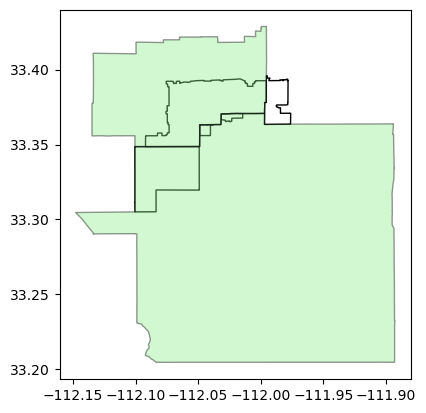

In [117]:
ax = district_intersect_zip[district_intersect_zip['ZCTA5CE20'] == "85042"].plot(color = 'white', edgecolor = 'black')

district_shape[(district_shape['NAME'].str.contains("Roosevelt|Kyrene"))]\
        .plot(ax = ax, color = 'lightgreen', alpha = .4, edgecolor = 'black')

Roosevelt
['85041', '85042', '85040']
Kyrene
['85283', '85048', '85045', '85044', '85284', '85226']
Tempe
['85281', '85283', '85282']


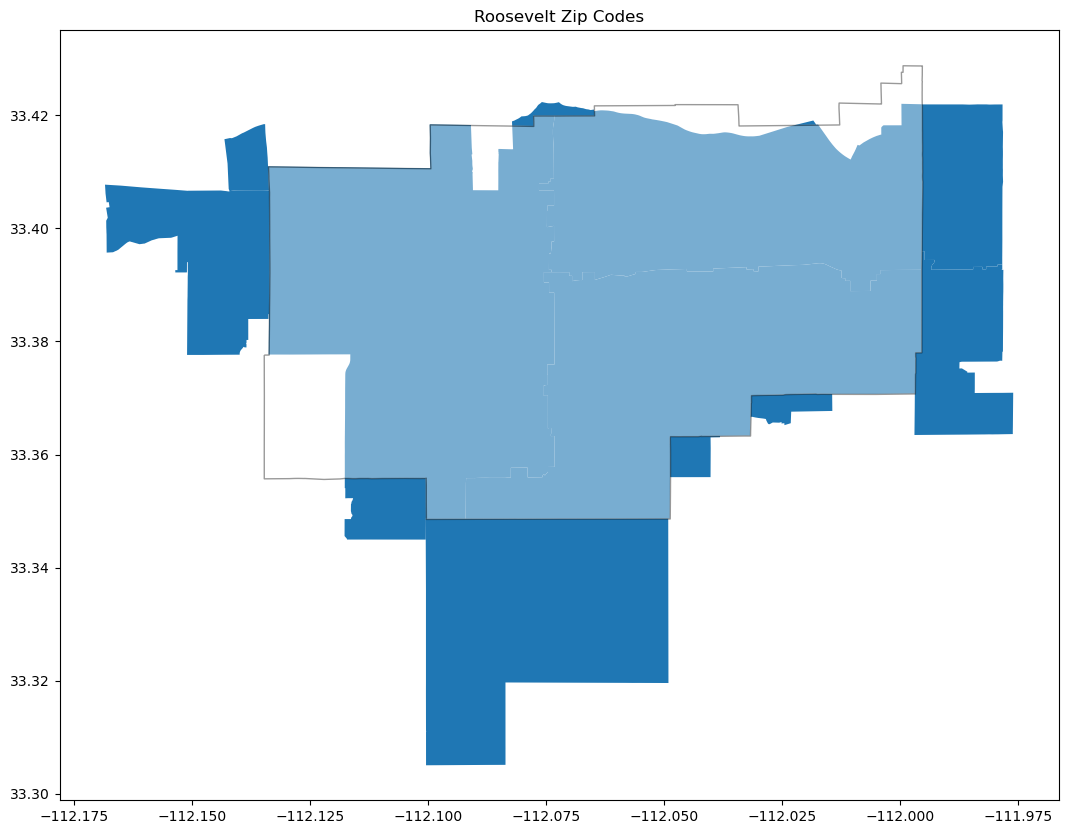

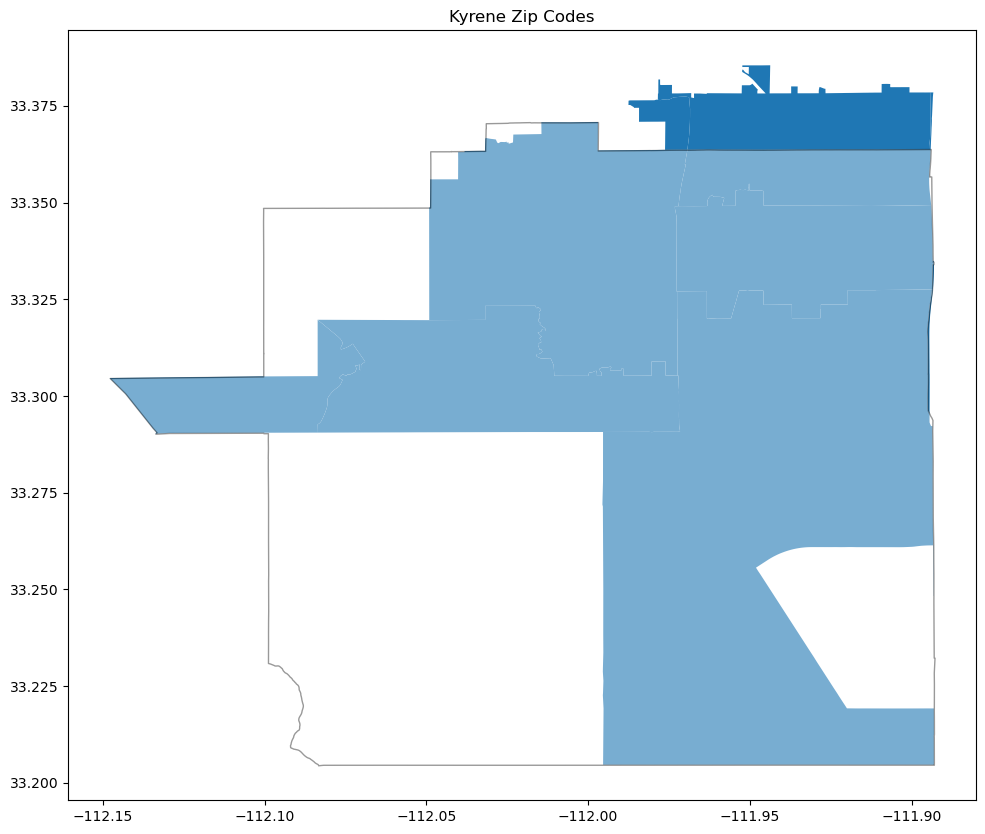

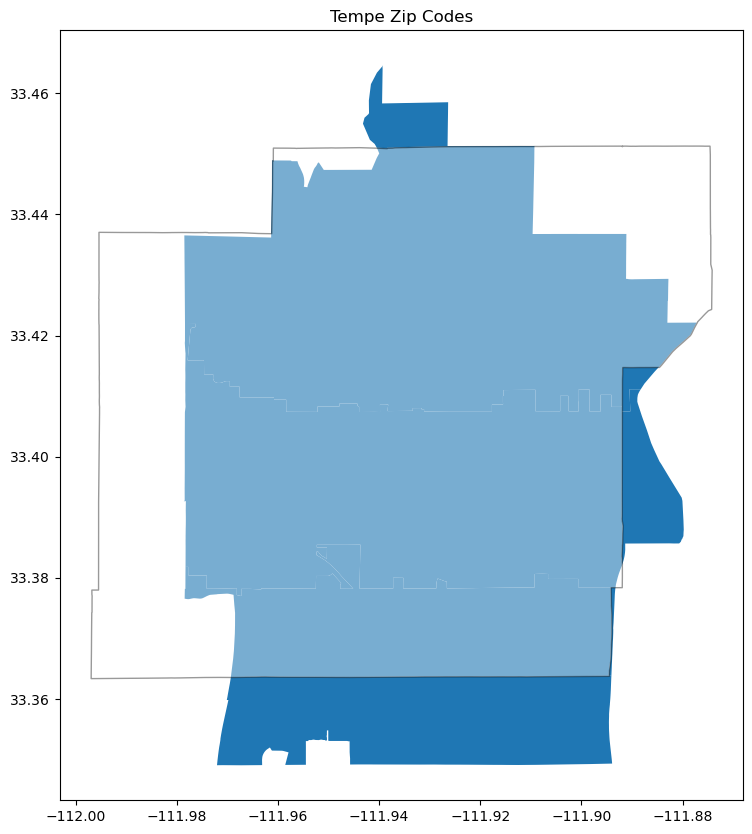

In [139]:
district_list = ['Roosevelt','Kyrene','Tempe']

threshold = .4

for district in district_list:
    print(district)
    exec(f'''{district} = district_intersect_zip[(district_intersect_zip['NAME'].str.contains("{district}")) & (district_intersect_zip['pct_overlap'] >= threshold)]''')
    exec(f'''{district}_zip_list = list({district}['ZCTA5CE20'])''')
    exec(f'''print({district}_zip_list)''')
    exec(f'''{district}_zips = district_intersect_zip[(district_intersect_zip['ZCTA5CE20'].isin({district}_zip_list))]''')
    exec(f'''ax = {district}_zips.plot(figsize = (18,10))''')
    exec(f'''district_shape[(district_shape['NAME'].str.contains("{district}"))]\
        .plot(ax = ax, color = 'white', alpha = .4, edgecolor = 'black')''')
    exec(f'''ax.set_title("{district} Zip Codes")''')

    # exec(f'''{district}['center'] = district['geometry'].centroid''')
    
    # roosevelt = district_intersect_zip[(district_intersect_zip['NAME'].str.contains("Roosevelt"))
    #                        & (district_intersect_zip['ZCTA5CE20'].isin(roosevelt_zip))]

    # roosevelt_zips = district_intersect_zip[(district_intersect_zip['ZCTA5CE20'].isin(roosevelt_zip))]

    # roosevelt["center"] = roosevelt["geometry"].centroid
    # roosevelt_points = roosevelt.copy()
    # roosevelt_points.set_geometry("center", inplace = True)
    # roosevelt = district_intersect_zip[(district_intersect_zip['NAME'].str.contains("Roosevelt")) & (district_intersect_zip['pct_overlap'] >= .5)]

In [90]:
list(Roosevelt['ZCTA5CE20'])

['85041', '85042', '85040']

In [39]:
district_intersect_zip[district_intersect_zip['NAME'].str.contains("Roosevelt")]\
    [['ZCTA5CE20','zip_area','district_area','district_intersect_zip_area','pct_overlap']].sort_values(by = 'pct_overlap', ascending = False)

,ZCTA5CE20,zip_area,district_area,district_intersect_zip_area,pct_overlap
705,85040,10.110554,33.195685,8.036089,0.794822
544,85041,16.017308,33.195685,12.349832,0.771030
546,85042,19.437130,33.195685,9.979136,0.513406
198,85034,11.580681,33.195685,1.015418,0.087682
626,85007,4.619769,33.195685,0.305505,0.066130
474,85339,258.545773,33.195685,1.509705,0.005839


In [40]:
roosevelt_zip = ['85040','85041','85042']

In [70]:
overlap = district_intersect_zip[district_intersect_zip['ZCTA5CE20'].isin(roosevelt_zip)].groupby(['NAME','ZCTA5CE20'])\
    ['pct_overlap'].sum().to_frame()

overlap[overlap['pct_overlap'] >= .05].unstack()


pct_overlap                    
ZCTA5CE20                           85040     85041     85042
NAME                                                         
Kyrene Elementary District            NaN       NaN  0.382182
Laveen Elementary District            NaN  0.206821       NaN
Roosevelt Elementary District    0.794822  0.771030  0.513406
Tempe School District            0.193090       NaN  0.104412

In [127]:
temp = df3[df3['Zip Code'].isin(Roosevelt_zip_list)].groupby(['Attending LEA ID',
                                                         'Attending LEA Name',
                                                         'Zip Code'])['Total ADM'].sum().to_frame().reset_index()

temp['Attending LEA ID'] = temp['Attending LEA ID'].astype(int)
temp['Entity Type'] = temp['Attending LEA ID'].map(ctd_adm_type_dict)
temp['Grades'] = temp['Attending LEA ID'].map(ctd_adm_grade_dict)

In [128]:
temp = temp[~ temp['Grades'].str.contains("12")]

In [129]:
temp['Zip Total ADM'] = temp.groupby(['Zip Code'])['Total ADM'].transform(np.sum)

C:\Users\matto\AppData\Local\Temp\ipykernel_43924\356902153.py:1: FutureWarning: The provided callable <function sum at 0x000002AF58067C40> is currently using SeriesGroupBy.sum. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "sum" instead.
  temp['Zip Total ADM'] = temp.groupby(['Zip Code'])['Total ADM'].transform(np.sum)


In [130]:
temp['pct'] = temp['Total ADM']/temp['Zip Total ADM']

In [131]:
temp

,Attending LEA ID,Attending LEA Name,Zip Code,Total ADM,Entity Type,Grades,Zip Total ADM,pct
3,4256,Phoenix Elementary District,85040,55.9486,District,'PK-8,3536.7835,0.015819
4,4256,Phoenix Elementary District,85041,176.9533,District,'PK-8,7518.4652,0.023536
5,4256,Phoenix Elementary District,85042,33.2500,District,'PK-8,3624.2182,0.009174
6,4258,Tempe School District,85040,731.9586,District,'PK-8,3536.7835,0.206956
7,4258,Tempe School District,85041,25.7436,District,'PK-8,7518.4652,0.003424
...,...,...,...,...,...,...,...,...
143,92716,ASU Preparatory Academy,85040,14.9430,Charter Holder,'K-4,3536.7835,0.004225
144,92716,ASU Preparatory Academy,85041,16.2095,Charter Holder,'K-4,7518.4652,0.002156
154,549803,"BASIS Charter Schools, Inc.",85040,25.9426,Charter Holder,'K-6,3536.7835,0.007335
155,549803,"BASIS Charter Schools, Inc.",85041,175.5039,Charter Holder,'K-6,7518.4652,0.023343


In [132]:
temp['Attending LEA Name Modified'] = np.where(temp['Entity Type'] == "Charter Holder", "Charter", temp['Attending LEA Name'])

In [135]:
aux = temp.groupby(['Attending LEA Name Modified','Zip Code'])[['Total ADM','pct']]\
    .sum().unstack().loc[['Roosevelt Elementary District',
                         'Charter',
                         'Tempe School District',
                         'Kyrene Elementary District',
                         'Laveen Elementary District'
                         ]].join(overlap[overlap['pct_overlap'] >= .05].unstack())

aux
# aux.to_csv(os.path.join(output, "Geographic_Versus_ADM_Pct.csv"))

Total ADM                             pct  \
                                   85040      85041      85042     85040   
Attending LEA Name Modified                                                
Roosevelt Elementary District  1481.2278  3316.2541  1299.2307  0.418806   
Charter                        1219.2835  2283.6322   960.9739  0.344744   
Tempe School District           731.9586    25.7436   996.1395  0.206956   
Kyrene Elementary District       48.3650   127.3004   323.7994  0.013675   
Laveen Elementary District           NaN  1578.0816    10.8247       NaN   

                                                  pct_overlap            \
                                  85041     85042       85040     85041   
Attending LEA Name Modified                                               
Roosevelt Elementary District  0.441081  0.358486    0.794822  0.771030   
Charter                        0.303736  0.265153         NaN       NaN   
Tempe School District          0.003424  0.274856    0.193090       NaN   
Kyrene Elementary District     0.016932  0.089343         NaN       NaN   
Laveen Elementary District     0.209894  0.002987         NaN  0.206821   

                                         
                                  85042  
Attending LEA Name Modified              
Roosevelt Elementary District  0.513406  
Charter                             NaN  
Tempe School District          0.104412  
Kyrene Elementary District     0.382182  
Laveen Elementary District          NaN

In [40]:
# roosevelt = district_intersect_zip[(district_intersect_zip['NAME'].str.contains("Roosevelt"))
#                        & (district_intersect_zip['ZCTA5CE20'].isin(roosevelt_zip))]

# roosevelt_zips = district_intersect_zip[(district_intersect_zip['ZCTA5CE20'].isin(roosevelt_zip))]

In [41]:
roosevelt["center"] = roosevelt["geometry"].centroid
roosevelt_points = roosevelt.copy()
roosevelt_points.set_geometry("center", inplace = True)

C:\Users\matto\AppData\Local\Temp\ipykernel_11228\1218497279.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  roosevelt["center"] = roosevelt["geometry"].centroid
C:\Users\matto\anaconda3\envs\Python_3_11\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [42]:
## Roosevelt Schools

<Axes: >

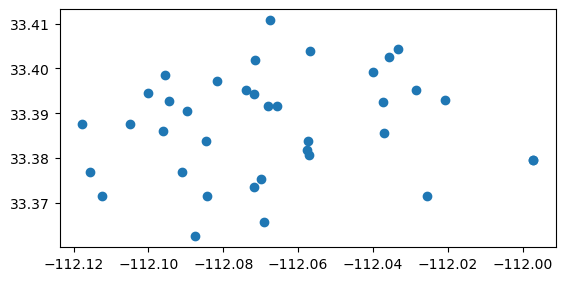

In [43]:
roosevelt_schools = gpd.sjoin(edge_gdf[~ edge_gdf['LEA Grade'].str.contains("12", na = False)], roosevelt)

roosevelt_schools.plot()

['Academy of Math and Science South Mountain' 'BASIS Phoenix South'
 'Bernard Black Elementary School' 'C J Jorgensen School'
 'EAGLE College Prep' 'Ed & Verma Pastor Elementary School'
 'Ignacio Conchos School' 'John R Davis School'
 'Southwest Elementary School' 'Sun Valley Academy'
 'Sunland Elementary School' 'V H Lassen Elementary School'
 'Valley View School' 'Victory High School - West Campus'
 'Amy L. Houston Academy' 'C O Greenfield School' 'Champion Schools'
 'Cloves C Campbell Sr Elementary School' 'George Gervin Prep Academy'
 'iAmRSDOnline Academy' 'John F Kennedy Elementary School'
 'Kaizen Education Foundation dba South Pointe Elementary Scho'
 'Maxine O Bush Elementary School' 'South Phoenix Prep and Arts Academy'
 'South Pointe Junior High School' 'South Valley Prep and Arts School'
 'T G Barr School' 'ASU Preparatory Academy - South Phoenix Intermediate'
 'ASU Preparatory Academy - South Phoenix Primary'
 'Cesar E Chavez Community School' 'EAGLE College Prep Phoenix S

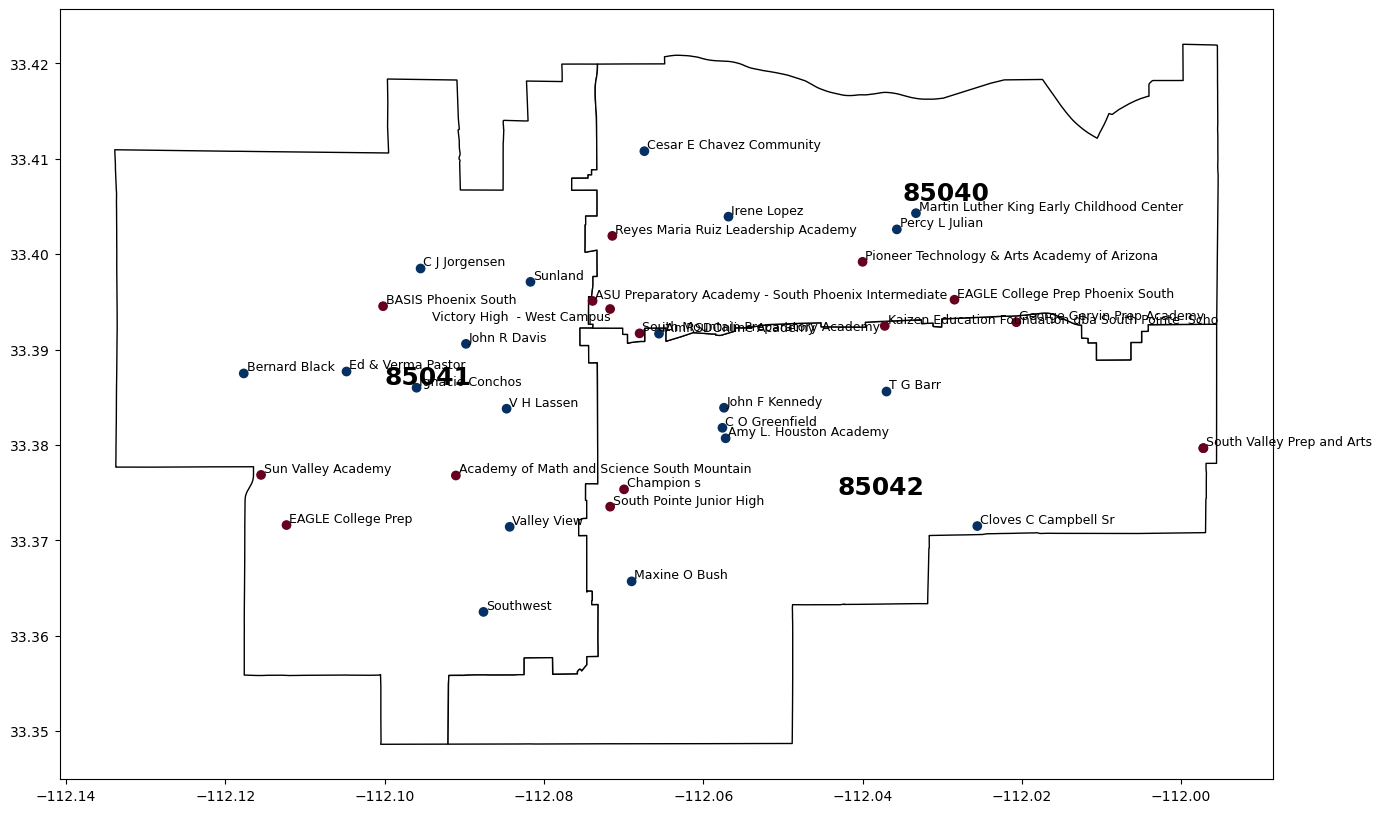

In [44]:
ax = roosevelt.plot(color="white", edgecolor="black", linewidth = 1, figsize=(18, 10))

for x, y, label in zip(roosevelt_points.geometry.x, roosevelt_points.geometry.y, roosevelt_points['ZCTA5CE20']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize = 18, weight = 'bold')
    
roosevelt_schools.plot(ax=ax, column = 'LEA Type', cmap = 'RdBu')

print(roosevelt_schools['School Name'].unique())

roosevelt_schools['School Name'] = roosevelt_schools['School Name'].str.replace("School","")
roosevelt_schools['School Name'] = roosevelt_schools['School Name'].str.replace("Schools","")
roosevelt_schools['School Name'] = roosevelt_schools['School Name'].str.replace("Elementary","")
roosevelt_schools['School Name'] = roosevelt_schools['School Name'].str.strip()

# roosevelt_schools['School Name'] = roosevelt_schools['School Name'].str.replace("South Phoenix Prep and Arts Academy","South Phoenix Prep and Arts ")

print(roosevelt_schools['School Name'].unique())

for x, y, label in zip(roosevelt_schools.geometry.x, roosevelt_schools.geometry.y, roosevelt_schools['School Name']):
    if label not in (['South Phoenix Prep and Arts Academy','ASU Preparatory Academy - South Phoenix Primary']):
        ax.annotate(label, xy=(x, y), xytext=(2, 2), textcoords="offset points", fontsize = 9)

# gpd.sjoin(roosevelt, edge_gdf[~ edge_gdf['LEA Grade'].str.contains("12", na = False)])\
#     .groupby(['ZCTA5CE20','LEA Type']).size().unstack()

# gpd.sjoin(roosevelt, edge_gdf[~ edge_gdf['LEA Grade'].str.contains("12", na = False)])\
#     .groupby(['ZCTA5CE20','LEA Type','LEA Name']).size()\
#     .unstack().transpose().fillna(0)

In [45]:
df3.columns

Index(['Attending LEA ID', 'Attending LEA Name', 'School Id', 'School Name',
       'Zip Code', 'Total ADM'],
      dtype='object')

In [46]:
df3['grade'] = df3['Attending LEA ID'].map(ctd_adm_grade_dict)

df3[(df3['Zip Code'].isin(roosevelt_zip)) & (~ df3['grade'].str.contains("12", na = False))]\
    .groupby(['Attending LEA Name','School Name','Zip Code'])['Total ADM'].sum().unstack()\
    .sort_values(by = '85042', ascending = False).head(20)

Zip Code                                                                                                  85040  \
Attending LEA Name                                 School Name                                                    
Tempe School District                              Nevitt Elementary School                            128.7902   
Roosevelt Elementary District                      C O Greenfield School                               162.5888   
                                                   Cloves C Campbell Sr Elementary School              113.1878   
Tempe School District                              Gililland Middle School                             224.1599   
Roosevelt Elementary District                      Maxine O Bush Elementary School                          NaN   
                                                   T G Barr School                                      87.9450   
                                                   John F Kennedy Elementary School                    114.5946   
Fit Kids, Inc. dba Champion Schools                Champion Schools                                     53.5919   
South Phoenix Academy Inc.                         South Phoenix Prep and Arts Academy                  68.8098   
South Valley Academy, Inc.                         South Valley Prep and Arts School                    49.4212   
Tempe School District                              Fees College Preparatory Middle School               18.9100   
                                                   Frank Elementary School                                  NaN   
Kyrene Elementary District                         Kyrene Centennial Middle School                      16.0000   
Kaizen Education Foundation dba South Pointe El... Kaizen Education Foundation dba South Pointe El...  122.0361   
Kyrene Elementary District                         Kyrene de las Lomas School                           19.9550   
Roosevelt Elementary District                      Valley View School                                   15.2026   
Phoenix Education Management, LLC,                 Pioneer Technology & Arts Academy of Arizona        290.3663   
Academy of Mathematics and Science South, Inc.     Academy of Math and Science South Mountain           40.0807   
Kaizen Education Foundation dba South Pointe Ju... South Pointe Junior High School                      39.9049   
Legacy Traditional School – Laveen Village         Legacy Traditional School – Laveen Village               NaN   

Zip Code                                                                                                  85041  \
Attending LEA Name                                 School Name                                                    
Tempe School District                              Nevitt Elementary School                             14.0036   
Roosevelt Elementary District                      C O Greenfield School                                28.2299   
                                                   Cloves C Campbell Sr Elementary School               25.2849   
Tempe School District                              Gililland Middle School                                  NaN   
Roosevelt Elementary District                      Maxine O Bush Elementary School                      36.5400   
                                                   T G Barr School                                      27.0850   
                                                   John F Kennedy Elementary School                     21.9200   
Fit Kids, Inc. dba Champion Schools                Champion Schools                                    216.4635   
South Phoenix Academy Inc.                         South Phoenix Prep and Arts Academy                  38.8550   
South Valley Academy, Inc.                         South Valley Prep and Arts School                    39.2621   
Tempe School District                              Fees College Preparatory Middle School

In [123]:
district_intersect_zip

,STATEFP,ELSDLEA,GEOID,NAME,LSAD,LOGRADE,HIGRADE,MTFCC,SDTYP,FUNCSTAT,...,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,zip_area,geometry,district_intersect_zip_area,pct_overlap
0,04,00004,0400004,Clarkdale-Jerome Elementary District,00,PK,08,G5400,None,E,...,G6350,S,672929610,380983,+34.8201308,-112.1079225,259.902634,"POLYGON ((-112.20163 34.70516, -112.20162 34.7...",68.770026,0.264599
1,04,02370,0402370,Cottonwood-Oak Creek Elementary District,00,PK,08,G5400,None,E,...,G6350,S,672929610,380983,+34.8201308,-112.1079225,259.902634,"MULTIPOLYGON (((-112.09078 34.71837, -112.0907...",175.077153,0.673626
2,04,NaN,0400003,Chino Valley Unified District,00,PK,12,G5420,None,E,...,G6350,S,672929610,380983,+34.8201308,-112.1079225,259.902634,"MULTIPOLYGON (((-112.20100 34.77499, -112.2010...",15.587524,0.059974
3,04,NaN,0403870,Humboldt Unified District,00,PK,12,G5420,None,E,...,G6350,S,672929610,380983,+34.8201308,-112.1079225,259.902634,"POLYGON ((-112.11224 34.65764, -112.11037 34.6...",0.467930,0.001800
4,04,00004,0400004,Clarkdale-Jerome Elementary District,00,PK,08,G5400,None,E,...,G6350,S,297087092,57790,+34.7398901,-112.4060602,114.704557,"POLYGON ((-112.20094 34.78083, -112.20087 34.7...",1.626589,0.014181
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1114,04,NaN,0408800,Tucson Unified District,00,PK,12,G5420,None,E,...,G6350,S,105627,0,+32.2407874,-110.9456049,0.040781,"POLYGON ((-110.94686 32.23977, -110.94679 32.2...",0.040781,1.000000
1115,04,NaN,0408800,Tucson Unified District,00,PK,12,G5420,None,E,...,G6350,S,96158,0,+32.2043406,-110.9452936,0.037125,"POLYGON ((-110.94757 32.20554, -110.94698 32.2...",0.037125,1.000000
1116,04,NaN,0408800,Tucson Unified District,00,PK,12,G5420,None,E,...,G6350,S,39176,0,+32.2310688,-110.9495675,0.015125,"POLYGON ((-110.95030 32.23172, -110.94813 32.2...",0.015125,1.000000
1117,04,NaN,0409160,Whiteriver Unified District,00,PK,12,G5420,None,E,...,G6350,S,18607053,37275,+33.7692531,-109.9792746,7.202488,"POLYGON ((-110.00065 33.78752, -110.00065 33.7...",7.202488,1.000000


In [151]:
ctds_adm_grade_dict

{4153: "'PK-12",
 4154: "'PK-12",
 4155: "'PK-12",
 4156: "'PK-12",
 4157: "'PK-12",
 4158: "'PK-12",
 4159: "'PK-12",
 4160: "'PK-8",
 4161: "'PK-8",
 4162: "'PK-8",
 4163: "'PK-8",
 4167: "'PK-8",
 1001687: "'10-12",
 4168: "'PK-12",
 4169: "'PK-12",
 79226: "'PK-12",
 4170: "'PK-12",
 4171: "'K-12",
 4172: "'PK-12",
 4173: "'PK-12",
 4174: "'PK-12",
 4175: "'PK-12",
 4176: "'PK-8",
 4177: "'PK-8",
 4178: "'PK-8",
 4179: "'PK-8",
 4180: "'PK-8",
 4181: "'K-8",
 4188: "'PK-8",
 4185: "'PK-8",
 4186: "'PK-8",
 4187: "'PK-8",
 4190: "'9-12",
 79403: "'9-12",
 81027: "'K-12",
 4191: "'K-12",
 79503: "'K-12",
 10386: "'PK-12",
 4192: "'PK-12",
 4193: "'PK-12",
 4194: "'PK-12",
 4195: "'PK-12",
 4196: "'PK-12",
 4197: "'PK-12",
 4198: "'PK-PK",
 4199: "'PK-8",
 79381: "'9-12",
 4204: "'6-12",
 79866: "'K-8",
 4205: "'K-8",
 4201: "'K-8",
 90862: "'K-12",
 4202: "'6-12",
 4203: "'K-6",
 4207: "'K-8",
 79086: "'K-8",
 89951: "'K-6",
 87600: "'3-12",
 4208: "'PK-12",
 4209: "'PK-12",
 4210: "

In [157]:
ctds_adm

,EntityID,Name,CTDS,Entity_Type,County,Physical_Street,pSuite,pCity,pState,pZip,pURL,pPhone,pFax,pAttention,MapLink,Fiscal_Year,Grades
0,4517,Coronado Elementary School,'010201102,District School,Apache,50 N Water St,NaN,St Johns,AZ,85936,http://,NaN,NaN,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'PK-3
1,4710,St Johns Middle School,'010201104,District School,Apache,"555 West, 7th Street",NaN,St Johns,AZ,85936,http://,9.283372e+09,9.283373e+09,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'4-8
2,4711,St Johns High School,'010201205,District School,Apache,360 Redskin Drive,NaN,St Johns,AZ,85936,http://,9.283372e+09,NaN,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'9-12
3,89607,St. Johns Learning Center,'010201206,District School,Apache,450 South 13th West,NaN,St Johns,AZ,85936,http://,9.283372e+09,9.283372e+09,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'9-12
4,4713,Integrated Preschool,'010208107,District School,Apache,Navajo Rte 12,NaN,FORT DEFIANCE,AZ,86504,http://,9.287298e+09,9.287298e+09,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'PK-PK
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2460,6200,Wenden Elementary School,'150419101,District School,La Paz,71001 Santa Fe Ave,NaN,Wenden,AZ,85357,http://,9.288594e+09,9.288594e+09,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'PK-8
2461,6201,Bouse Elementary School,'150426101,District School,La Paz,44936 Joshua Drive,NaN,Bouse,AZ,85325,http://,NaN,NaN,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'PK-8
2462,6201,Bouse Elementary School,'150426101,District School,La Paz,44936 Joshua Drive,NaN,Bouse,AZ,85325,http://,9.288512e+09,9.288513e+09,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'PK-8
2463,6202,Salome Elementary School,'150430101,District School,La Paz,38128 Saguaro & Main,NaN,Salome,AZ,85348,http://,9.288593e+09,9.288593e+09,NaN,http://www.mapquest.com/cgi-bin/ia_free?width=...,2022,'PK-8


In [188]:
destination_Roosevelt_gdf['Entity_Type'].unique()

array(['Charter School', 'District School'], dtype=object)

In [214]:
destination_Roosevelt_gdf[destination_Roosevelt_gdf['Attending LEA ID'] == 4279]['Grades'].value_counts()

Grades
'K-8     10
'PK-8     5
'4-8      2
'K-3      2
Name: count, dtype: int64

In [237]:
school_level_dict = dict(zip(edge['State School ID'].astype(int), edge['School Level']))

In [238]:
destination_Roosevelt_gdf['School ID'].dtype

dtype('int64')

In [239]:
destination_Roosevelt_gdf['School Level'] = destination_Roosevelt_gdf['School ID'].map(school_level_dict)

In [240]:
destination_Roosevelt_gdf['School Level']

0      Elementary
2      Elementary
3      Elementary
7      Elementary
9      Elementary
          ...    
125        Middle
126    Elementary
127        Middle
128        Middle
129    Elementary
Name: School Level, Length: 106, dtype: object

In [245]:
# Instructional Level
# The lowest and highest grade offered by a school determines its instructional level. 
# The four instructional levels are: 
# 1) primary (lowest grade of prekindergarten to 3; highest grade up to 8), 
# 2) middle (lowest grade 4 to 7; highest grade 4 to 9), 
# 3) high (lowest grade 7 to 12; highest grade 12), 
# 4) other (all other configurations, including prekindergarten, kindergarten, or 1 to 12).

In [ ]:
destination_Roosevelt_gdf

In [248]:
destination_Roosevelt_gdf.columns

Index(['Attending LEA ID', 'Attending LEA Name', 'School ID', 'School Name',
       'Boundary District ID', 'Boundary District Name', 'Total ADM',
       'State Name', 'School ID - NCES Assigned', 'Latitude', 'Longitude',
       'State School ID', 'State Agency ID', 'School Level', 'LEAID',
       'LEA Type', 'LEA Grade', 'LEA Name', 'Letter', 'EntityID', 'Name',
       'CTDS', 'Entity_Type', 'County', 'Physical_Street', 'pSuite', 'pCity',
       'pState', 'pZip', 'pURL', 'pPhone', 'pFax', 'pAttention', 'MapLink',
       'Fiscal_Year', 'Grades', 'geometry'],
      dtype='object')

## Top Destination Schools

In [265]:
destination_Roosevelt_gdf[destination_Roosevelt_gdf['Attending LEA ID'] != 4279]\
    .groupby(['Entity_Type'])['Total ADM'].sum().to_frame()\
    .sort_values(by = ['Total ADM'], ascending = False).head(20)

,Total ADM
Entity_Type,
Charter School,3667.4632
District School,1870.6379


In [264]:
destination_Roosevelt_gdf[destination_Roosevelt_gdf['Attending LEA ID'] != 4279]\
    .groupby(['Attending LEA Name','Entity_Type'])['Total ADM'].sum().to_frame()\
    .sort_values(by = ['Total ADM'], ascending = False).head(20)

,,Total ADM
Attending LEA Name,Entity_Type,
Laveen Elementary District,District School,485.5146
Kyrene Elementary District,District School,470.8267
"Fit Kids, Inc. dba Champion Schools",Charter School,407.2133
"Phoenix Education Management, LLC,",Charter School,389.3511
Phoenix Elementary District,District School,347.6650
Espiritu Community Development Corp.,Charter School,342.9846
"Morrison Education Group, Inc.",Charter School,331.7810
Tempe School District,District School,318.5707
"EAGLE South Mountain Charter, Inc.",Charter School,314.0366


In [263]:
destination_Roosevelt_gdf[destination_Roosevelt_gdf['Attending LEA ID'] != 4279]\
    .groupby(['Attending LEA Name','School Level','School Name','Letter','Entity_Type'])['Total ADM'].sum().to_frame()\
    .sort_values(by = ['Total ADM'], ascending = False).head(20)

,,,,,Total ADM
Attending LEA Name,School Level,School Name,Letter,Entity_Type,
"Fit Kids, Inc. dba Champion Schools",Elementary,Champion Schools,C,Charter School,407.2133
"Phoenix Education Management, LLC,",Elementary,Pioneer Technology & Arts Academy of Arizona,C,Charter School,389.3511
Espiritu Community Development Corp.,Elementary,Reyes Maria Ruiz Leadership Academy,B,Charter School,342.9846
"Morrison Education Group, Inc.",Elementary,Sun Valley Academy,C,Charter School,331.7810
"EAGLE South Mountain Charter, Inc.",Elementary,EAGLE College Prep,B,Charter School,314.0366
"Academy of Mathematics and Science South, Inc.",Elementary,Academy of Math and Science South Mountain,B,Charter School,308.5103
"BASIS Charter Schools, Inc.",Other,BASIS Phoenix South,D,Charter School,225.1632
Laveen Elementary District,Elementary,Vista del Sur Accelerated,A,District School,162.0246
"George Gervin Youth Center, Inc.",Elementary,George Gervin Prep Academy,B,Charter School,123.2560


In [246]:
destination_district = destination_Roosevelt_gdf.groupby(['Attending LEA Name','School Level'])
    ['Total ADM'].sum().sort_values(ascending = False).unstack()

destination_district['total'] = destination_district.sum(axis = 1)

destination_district.sort_values(by = ['total'], ascending = False)

School Level,Elementary,Middle,Other,total
Attending LEA Name,,,,
Roosevelt Elementary District,5375.3159,708.7072,NaN,6084.0231
Laveen Elementary District,485.5146,NaN,NaN,485.5146
Kyrene Elementary District,259.5128,211.3139,NaN,470.8267
"Fit Kids, Inc. dba Champion Schools",407.2133,NaN,NaN,407.2133
"Phoenix Education Management, LLC,",389.3511,NaN,NaN,389.3511
Phoenix Elementary District,347.6650,NaN,NaN,347.6650
Espiritu Community Development Corp.,342.9846,NaN,NaN,342.9846
"Morrison Education Group, Inc.",331.7810,NaN,NaN,331.7810
Tempe School District,251.2207,67.3500,NaN,318.5707


Text(0.5, 1.0, 'Destination Schools - Roosevelt Residents')

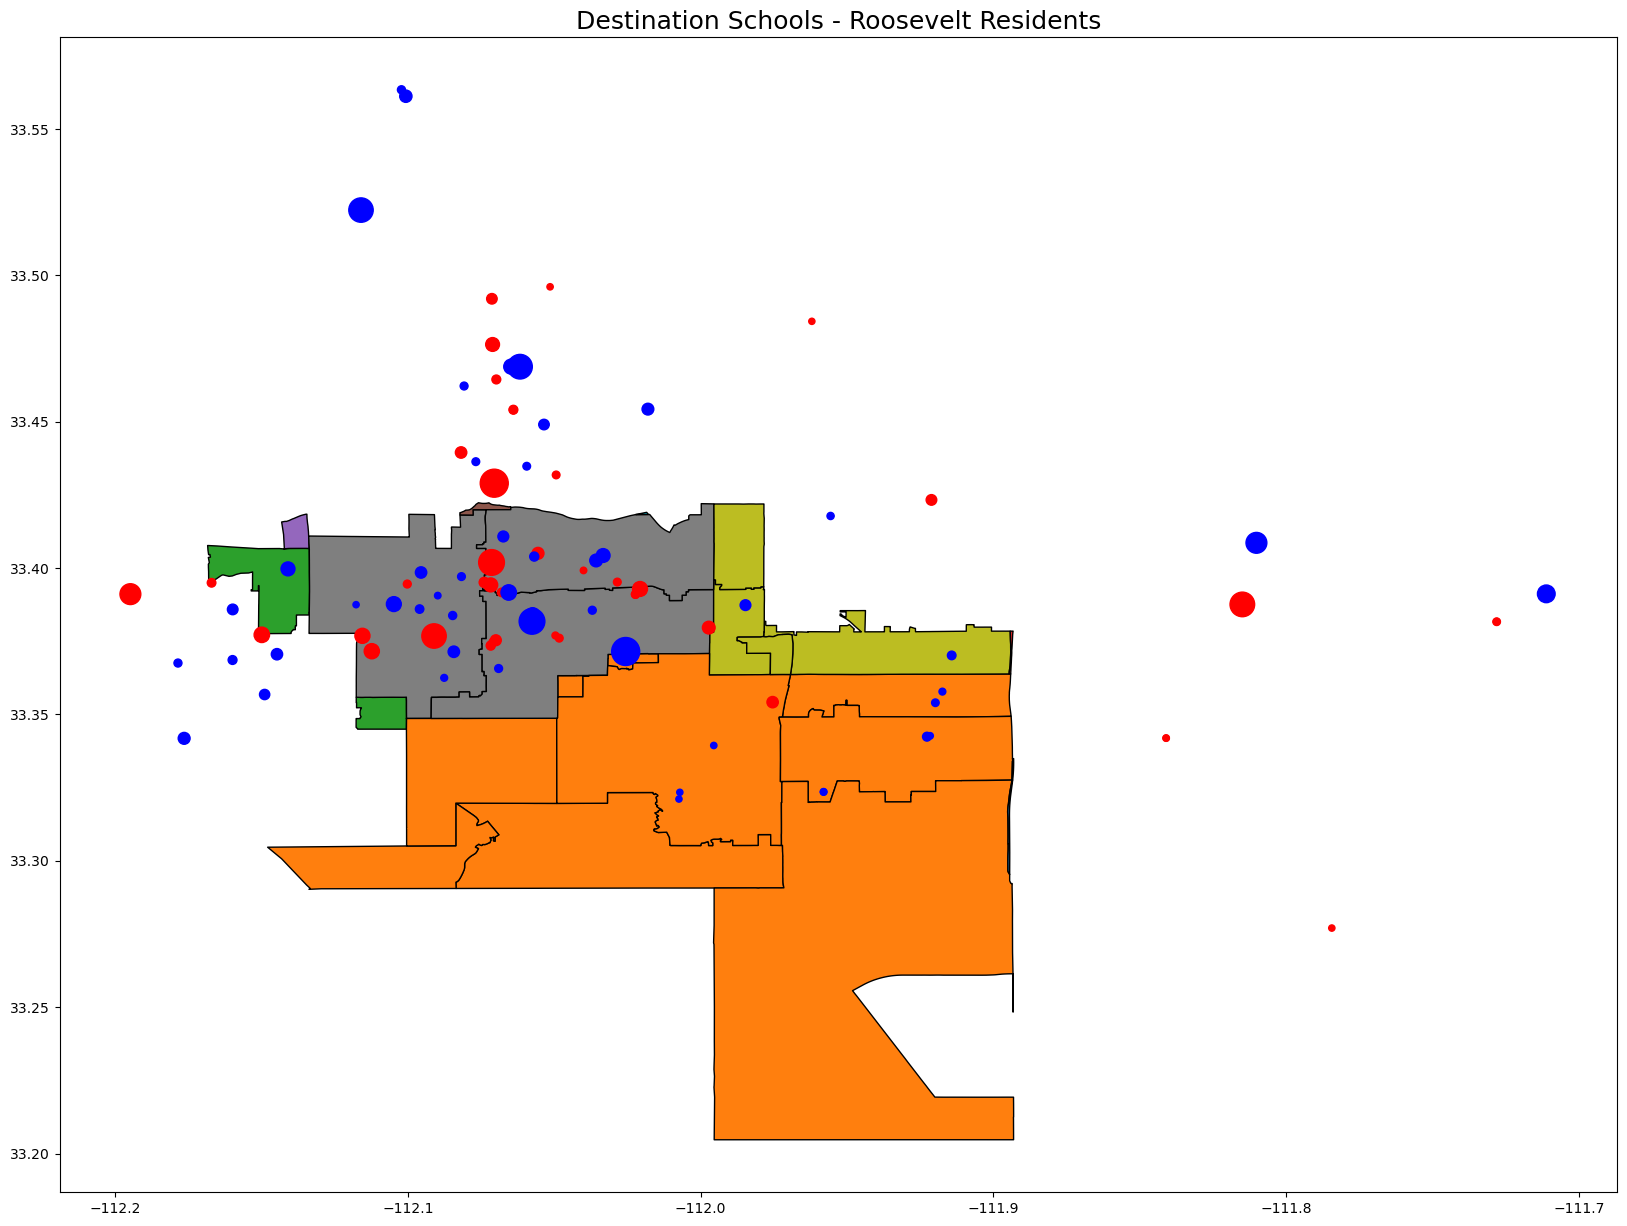

In [269]:
ax = district_intersect_zip[district_intersect_zip['ZCTA5CE20'].isin(Roosevelt_zip_list + Kyrene_zip_list)]\
    .plot(figsize = (30,15), column = 'NAME', edgecolor = 'black')

destination_Roosevelt = df[df['Boundary District ID'] == 4279].merge(edge).merge(ctds_adm, 
                                                    left_on = ['School ID'], right_on = ['EntityID'])

destination_Roosevelt_gdf = gpd.GeoDataFrame(destination_Roosevelt, 
                                geometry = gpd.points_from_xy(destination_Roosevelt.Longitude, destination_Roosevelt.Latitude))

#display(destination_Roosevelt_gdf[~ destination_Roosevelt_gdf['Grades'].str.contains('12')]\
#            .groupby(['Attending LEA Name','Attending LEA ID'])['Total ADM'].sum().sort_values(ascending = False))

destination_Roosevelt_gdf = destination_Roosevelt_gdf[  (destination_Roosevelt_gdf['Total ADM'] >= 20) 
                                                      & (destination_Roosevelt_gdf['Attending LEA ID'] != 79961)]

destination_Roosevelt_gdf[destination_Roosevelt_gdf['Entity_Type'] == "Charter School"]\
    .plot(ax = ax, markersize = destination_Roosevelt_gdf['Total ADM'], color = 'red')

destination_Roosevelt_gdf[destination_Roosevelt_gdf['Entity_Type'] == "District School"]\
    .plot(ax = ax, markersize = destination_Roosevelt_gdf['Total ADM'], color = 'blue')

ax.set_title("Destination Schools - Roosevelt Residents", fontsize = 18)

In [145]:
df[df['Boundary District ID'] == 4279].merge(edge)

,Attending LEA ID,Attending LEA Name,School ID,School Name,Boundary District ID,Boundary District Name,Total ADM,State Name,School ID - NCES Assigned,Latitude,Longitude,State School ID,State Agency ID,School Level,LEAID,LEA Type,LEA Grade,LEA Name,Letter
0,90878,"Academy of Mathematics and Science South, Inc.",1000379,Academy of Math and Science South Mountain,4279,Roosevelt Elementary District,308.5103,ARIZONA,4.008910e+10,33.376799,-112.091068,1000379,AZ-90878,Elementary,90878,Charter Holder,'K-8,"Academy of Mathematics and Science South, Inc.",B
1,79961,"Academy of Mathematics and Science, Inc.",1001666,Academy of Math and Science Advanced Virtual A...,4279,Roosevelt Elementary District,30.9387,ARIZONA,4.003680e+10,32.269519,-110.960699,1001666,AZ-79961,Elementary,79961,Charter Holder,'K-12,"Academy of Mathematics and Science, Inc.",NaN
2,4280,Alhambra Elementary District,5381,Alhambra Traditional School,4279,Roosevelt Elementary District,22.2059,Arizona,4.006000e+10,33.522302,-112.116018,5381,AZ-4280,Elementary,4280,District,'PK-8,Alhambra Elementary District,A
3,4347,"Allen-Cochran Enterprises, Inc.",5521,Center for Educational Excellence,4279,Roosevelt Elementary District,14.5000,Arizona,4.001110e+10,33.349994,-111.913600,5521,AZ-4347,Elementary,4347,Charter Holder,'K-8,"Allen-Cochran Enterprises, Inc.",A
4,79461,American Virtual Academy,81178,Primavera - Online,4279,Roosevelt Elementary District,20.1161,Arizona,4.003290e+10,33.341920,-111.840971,81178,AZ-79461,High,79461,Charter Holder,'6-12,American Virtual Academy,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
122,4260,Washington Elementary School District,5266,Royal Palm Middle School,4279,Roosevelt Elementary District,34.4160,Arizona,4.090600e+10,33.561200,-112.100700,5266,AZ-4260,Middle,4260,District,'PK-8,Washington Elementary School District,B
123,90036,"West Valley Arts and Technology Academy, Inc.",90037,Riverbend Prep,4279,Roosevelt Elementary District,23.9164,Arizona,4.007860e+10,33.394980,-112.167071,90037,AZ-90036,Elementary,90036,Charter Holder,'K-8,"West Valley Arts and Technology Academy, Inc.",D
124,4261,Wilson Elementary District,5276,Wilson Elementary School,4279,Roosevelt Elementary District,20.5792,Arizona,4.093900e+10,33.454300,-112.018000,5276,AZ-4261,Middle,4261,District,'PK-8,Wilson Elementary District,B
125,4261,Wilson Elementary District,5276,Wilson Elementary School,4279,Roosevelt Elementary District,20.5792,Arizona,4.049700e+10,33.391200,-111.711100,6229,AZ-4235,Elementary,4235,District,'PK-12,Mesa Unified District,B


## Roosevelt Zipcodes

<Axes: >

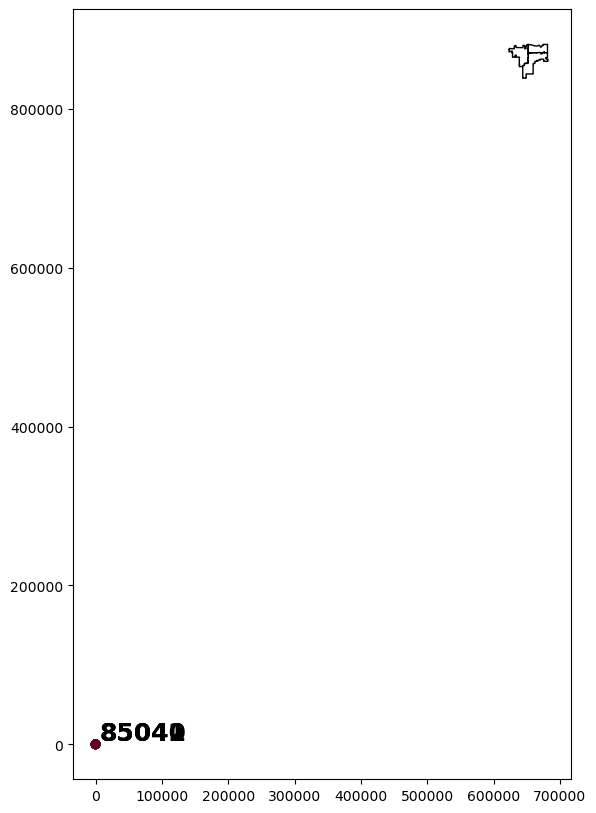

In [48]:

# zip_shape.to_crs('EPSG:4269',inplace = True)

ax = zip_shape[zip_shape['ZCTA5CE20'].isin(roosevelt_zip)].plot(color = 'white', edgecolor = 'black', figsize = (18,10))

roosevelt.plot(ax=ax, edgecolor = 'black')

for x, y, label in zip(roosevelt_points.geometry.x, roosevelt_points.geometry.y, roosevelt_points['ZCTA5CE20']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize = 18, weight = 'bold')
    
roosevelt_zip_schools = gpd.sjoin(edge_gdf[~ edge_gdf['LEA Grade'].str.contains("12", na = False)], roosevelt_zips)

roosevelt_zip_schools.plot(ax = ax, column = 'LEA Type', cmap = 'RdBu')

In [95]:
kyrene = district_intersect_zip[(district_intersect_zip['NAME'].str.contains("Kyrene")) & (district_intersect_zip['pct_overlap'] >= .4)]

kyrene_zip = list(kyrene['ZCTA5CE20'].unique())

kyrene["center"] = kyrene["geometry"].centroid
kyrene_points = kyrene.copy()
kyrene_points.set_geometry("center", inplace = True)

C:\Users\matto\AppData\Local\Temp\ipykernel_11228\39400137.py:5: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  kyrene["center"] = kyrene["geometry"].centroid
C:\Users\matto\anaconda3\envs\Python_3_11\Lib\site-packages\geopandas\geodataframe.py:1543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


In [118]:
ax = zip_shape[(zip_shape['ZCTA5CE20'].isin(kyrene_zip + roosevelt_zip))].plot(color = 'white', edgecolor = 'black', figsize = (18,10))

NameError: name 'kyrene_zip' is not defined

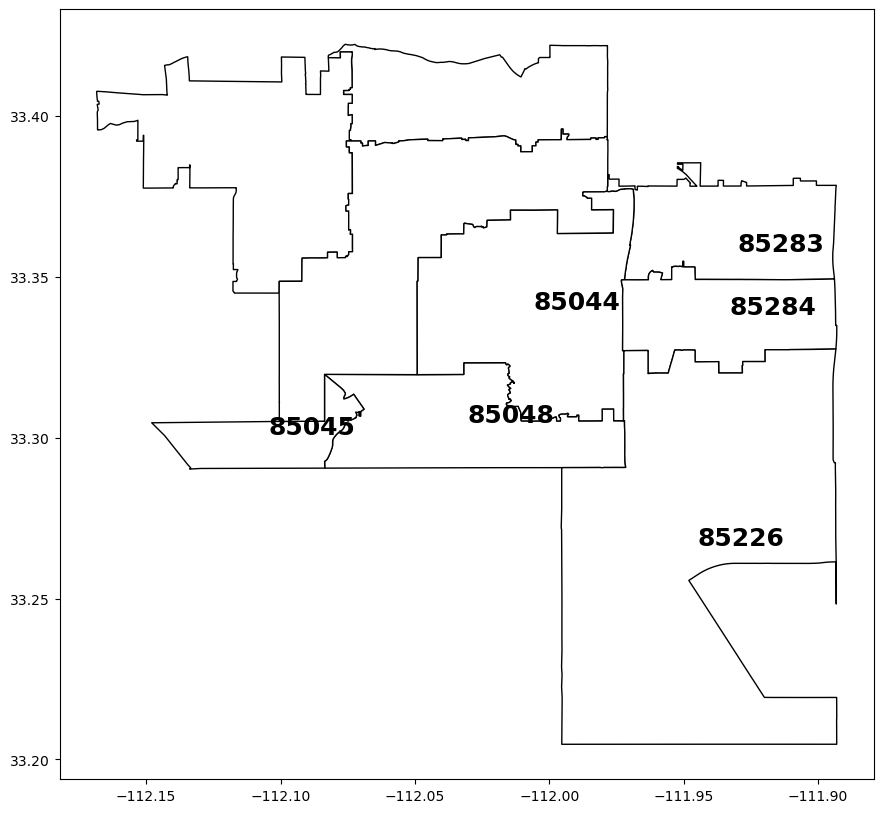

In [96]:
ax = zip_shape[(zip_shape['ZCTA5CE20'].isin(kyrene_zip)) | ((zip_shape['ZCTA5CE20'].isin(roosevelt_zip)))].plot(color = 'white', edgecolor = 'black', figsize = (18,10))

for x, y, label in zip(kyrene_points.geometry.x, kyrene_points.geometry.y, kyrene_points['ZCTA5CE20']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize = 18, weight = 'bold')


<Axes: >

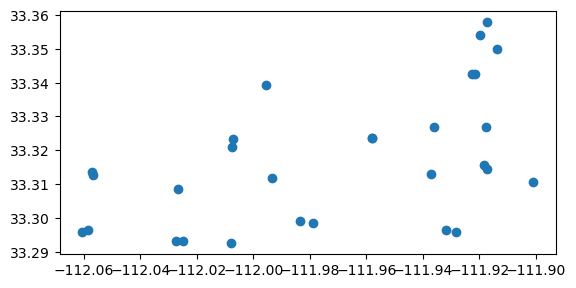

In [97]:
kyrene_schools = gpd.sjoin(edge_gdf[~ edge_gdf['LEA Grade'].str.contains("12", na = False)], kyrene)

kyrene_schools.plot()

In [98]:
bus_schools = kyrene_schools[kyrene_schools['State School ID'].astype(int).isin(bus_list)]

<Axes: >

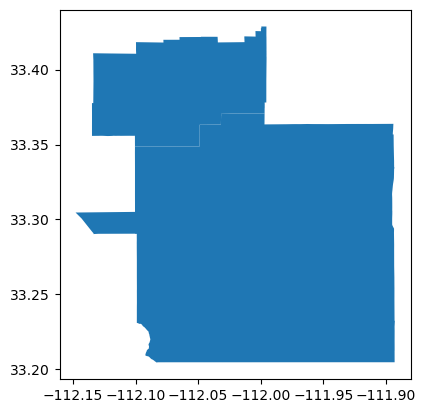

In [99]:
district_shape[district_shape['NAME'].str.contains("Roosevelt|Kyrene")].plot()

<Axes: title={'center': 'Roosevelt and Kyrene Zip Codes'}>

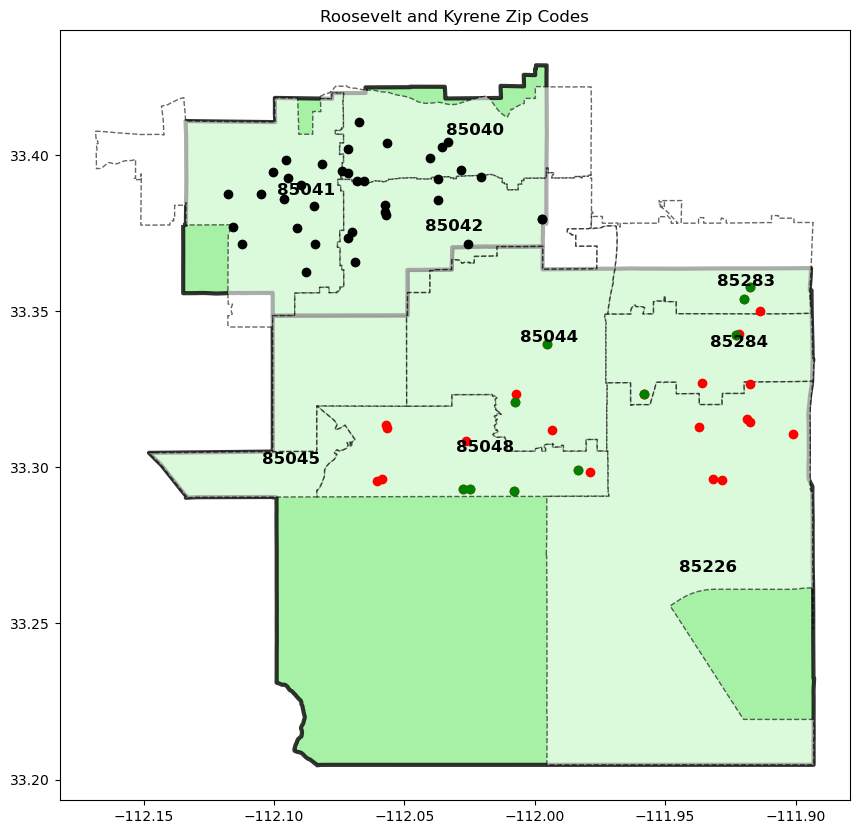

In [100]:
ax = district_shape[district_shape['NAME'].str.contains("Roosevelt|Kyrene")].plot(color = 'lightgreen', 
                                                                             edgecolor = 'black', alpha = .8, 
                                                                                  linewidth = 3, figsize = (18,10))


zip_shape[(zip_shape['ZCTA5CE20'].isin(kyrene_zip)) | ((zip_shape['ZCTA5CE20'].isin(roosevelt_zip)))]\
    .plot(color = 'white', edgecolor = 'black', ax = ax, linestyle='--', alpha = .6)

ax.set_title("Roosevelt and Kyrene Zip Codes")


for x, y, label in zip(roosevelt_points.geometry.x, roosevelt_points.geometry.y, roosevelt_points['ZCTA5CE20']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize = 12, weight = 'bold')
    
for x, y, label in zip(kyrene_points.geometry.x, kyrene_points.geometry.y, kyrene_points['ZCTA5CE20']):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points", fontsize = 12, weight = 'bold')

kyrene_schools.plot(ax = ax, color = 'red')
roosevelt_schools.plot(ax = ax, color = 'black')
bus_schools.plot(ax = ax, color = 'green')

In [105]:
df.columns

Index(['Attending LEA ID', 'Attending LEA Name', 'School ID', 'School Name',
       'Boundary District ID', 'Boundary District Name', 'Total ADM'],
      dtype='object')

In [144]:
top_roosevelt_destinations = df[(df['Boundary District ID'] == 4279) & (df['Attending LEA ID'].isin([4267,4258]))]\
    .groupby(['School Name','Attending LEA Name'])['Total ADM'].sum().sort_values(ascending = False).to_frame().reset_index()

top_destinations = list(top_roosevelt_destinations['School Name'])

In [126]:
df3

,Attending LEA ID,Attending LEA Name,School Id,School Name,Zip Code,Total ADM,grade
0,1000166,A+ Charter Schools,1000972,A+ Charter Schools,85138,180.9777,'7-12
1,1000166,A+ Charter Schools,1000972,A+ Charter Schools,85139,60.7659,'7-12
2,1000166,A+ Charter Schools,1000972,A+ Charter Schools,Other,3.9821,'7-12
3,90199,"Academy Del Sol, Inc.",90200,Academy Del Sol,85705,109.5793,'K-8
4,90199,"Academy Del Sol, Inc.",90200,Academy Del Sol,Other,54.3089,'K-8
...,...,...,...,...,...,...,...
11594,4507,Yuma Union High School District,6189,Yuma High School,85365,59.8398,'9-12
11595,4507,Yuma Union High School District,6189,Yuma High School,Other,17.3300,'9-12
11596,4507,Yuma Union High School District,6189,Yuma High School,85350,12.5242,'9-12
11597,4507,Yuma Union High School District,91316,Yuma Online Distance Academy,Other,28.5556,'9-12


In [147]:
df3[(df3['Zip Code'].isin(roosevelt_zip)) & (~ df3['grade'].str.contains('12', na = False))]\
    .groupby(['Attending LEA Name','School Name','Zip Code'])['Total ADM'].sum().unstack().reset_index()\
    .merge(top_roosevelt_destinations).sort_values(by = 'Total ADM', ascending = False)

,Attending LEA Name,School Name,85040,85041,85042,Total ADM
19,Tempe School District,Nevitt Elementary School,128.7902,14.0036,402.2272,101.6762
2,Kyrene Elementary District,Kyrene Centennial Middle School,16.0000,28.1615,78.6213,98.7018
6,Kyrene Elementary District,Kyrene de las Lomas School,19.9550,21.5000,62.3357,83.6972
4,Kyrene Elementary District,Kyrene Middle School,12.4100,25.7800,40.5727,67.6927
3,Kyrene Elementary District,Kyrene Digital Academy,NaN,18.8889,17.9784,33.6265
9,Kyrene Elementary District,Kyrene del Norte School,NaN,10.4700,31.0000,32.4700
5,Kyrene Elementary District,Kyrene de la Colina School,NaN,11.5000,23.8548,31.9748
8,Kyrene Elementary District,Kyrene de los Ninos School,NaN,NaN,17.0500,31.2200
16,Tempe School District,Gililland Middle School,224.1599,NaN,215.3732,30.2200
15,Tempe School District,Fees College Preparatory Middle School,18.9100,11.7400,91.2299,25.7400
